# 집값 예측 경진대회 EDA

안녕하세요! 집값 예측 경진대회로 돌아온 데이콘 Basic 입니다!

이번 대회는 집의 면적, 지어진 연도, 퀄리티 등 집에 대한 다양한 정보들을 통해 집값 예측하는 대회입니다.

SalesPrice인 target은 정수값으로 이루어져 있습니다.

대회를 시작하기 앞서 어떤 데이터가 주어졌고 어떤 방식으로 활용할 수 있을지 

데이터를 분석하고 시각화하며 인사이트를 얻어내는 작업이 필요합니다.

## 패키지 설치

EDA를 시작하기에 앞서 필요한 패키지들을 설치합니다.

In [1]:
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn
# !pip install sklearn

## 데이터 불러오기

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# 다운받은 csv를 pandas의 DataFrame 형식으로 불러옵니다.
data = pd.read_csv('train.csv')

# id 는 제외하고 분석합니다.
data = data.drop('id', axis=1)
#pd.set_option('display.max_columns', None) # 컬럼이 요약되지 않도록 설정합니다.
data # 데이터를 확인합니다.

,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
0,10,2392,Ex,3,968,Ex,2392,2392,Ex,2,2003,2003,2003,386250
1,7,1352,Gd,2,466,Gd,1352,1352,Ex,2,2006,2007,2006,194000
2,5,900,TA,1,288,TA,864,900,TA,1,1967,1967,1967,123000
3,5,1174,TA,2,576,Gd,680,680,TA,1,1900,2006,2000,135000
4,7,1958,Gd,3,936,Gd,1026,1026,Gd,2,2005,2005,2005,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,6,1756,Gd,2,422,TA,872,888,Ex,2,1996,1997,1996,204000
1346,9,2748,Gd,3,850,Ex,1850,1850,Ex,2,2006,2006,2006,390000
1347,5,1214,TA,1,318,TA,1214,1214,TA,2,1967,1967,1967,143000
1348,5,894,TA,2,440,TA,864,894,Gd,1,1974,1974,1974,131000


데이터를 보아하니 숫자형태의 변수도 있는 반면 텍스트로 이루어진 범주형 변수들이 다수 존재하는 걸로 보입니다.

따라서 분석 전에 적절한 처리가 필요할 것 같습니다.

## 결측치 확인

결측치(NA: Not Available)란 값이 누락된 데이터를 말합니다.

보다 정확한 분석을 하기 위해서는 데이터의 결측치를 확인하고 적절히 처리해주어야 합니다.

이번 데이터에 결측치가 있나 확인해볼까요?

In [4]:
def check_missing_col(dataframe):
    missing_col = []
    for col in dataframe.columns:
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            print(f'결측치가 있는 컬럼은: {col} 입니다')
            print(f'해당 컬럼에 총 {missing_values} 개의 결측치가 존재합니다.')
            missing_col.append([col, dataframe[col].dtype])
    if missing_col == []:
        print('결측치가 존재하지 않습니다')
    return missing_col

missing_col = check_missing_col(data)

결측치가 존재하지 않습니다


### 결측치 처리

이번 데이터에는 결측치가 존재하지 않네요. 

결측치 처리 과정은 필요하지 않겠습니다.

## 기초 통계 분석

이제 본격적으로 우리가 가진 데이터를 분석 해보도록 하겠습니다!

주어진 데이터를 기초 통계량이라는 숫자로 요약하고 확인해보겠습니다.

In [5]:
# 기초 통계량을 살펴봅니다.
data.describe()

,Overall Qual,Gr Liv Area,Garage Cars,Garage Area,Total Bsmt SF,1st Flr SF,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
count,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,6.208889,1513.542222,1.870370,502.014815,1082.644444,1167.474074,1.560741,1972.987407,1985.099259,1978.471852,186406.312593
std,1.338015,487.523239,0.652483,191.389956,384.067713,375.061407,0.551646,29.307257,20.153244,25.377278,78435.424758
min,2.000000,480.000000,1.000000,100.000000,105.000000,480.000000,0.000000,1880.000000,1950.000000,1900.000000,12789.000000
25%,5.000000,1144.000000,1.000000,368.000000,816.000000,886.250000,1.000000,1955.000000,1968.000000,1961.000000,135000.000000
50%,6.000000,1445.500000,2.000000,484.000000,1009.000000,1092.500000,2.000000,1976.000000,1993.000000,1978.500000,165375.000000
75%,7.000000,1774.500000,2.000000,588.000000,1309.500000,1396.500000,2.000000,2002.000000,2004.000000,2002.000000,217875.000000
max,10.000000,4476.000000,5.000000,1488.000000,2660.000000,2898.000000,4.000000,2010.000000,2010.000000,2207.000000,745000.000000


분석의 편의를 위해 수치형 feature와 카테고리형 feature를 분리해주겠습니다.

In [5]:
# 전체의 데이터 타입을 확인합니다
data.dtypes

Overall Qual       int64
Gr Liv Area        int64
Exter Qual        object
Garage Cars        int64
Garage Area        int64
Kitchen Qual      object
Total Bsmt SF      int64
1st Flr SF         int64
Bsmt Qual         object
Full Bath          int64
Year Built         int64
Year Remod/Add     int64
Garage Yr Blt      int64
target             int64
dtype: object

In [6]:
numeric_feature = data.columns[(data.dtypes==int) | (data.dtypes== float)]
categorical_feature = data.columns[data.dtypes=='O']

print("수치형 데이터는 다음과 같습니다. \n", list(numeric_feature))
print("카테고리형 데이터는 다음과 같습니다. \n", list(categorical_feature))

수치형 데이터는 다음과 같습니다. 
 ['Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Garage Area', 'Total Bsmt SF', '1st Flr SF', 'Full Bath', 'Year Built', 'Year Remod/Add', 'Garage Yr Blt', 'target']
카테고리형 데이터는 다음과 같습니다. 
 ['Exter Qual', 'Kitchen Qual', 'Bsmt Qual']


### 수치형 데이터 시각화

Box plot 을 이용해서 수치형 데이터를 시각화합니다.

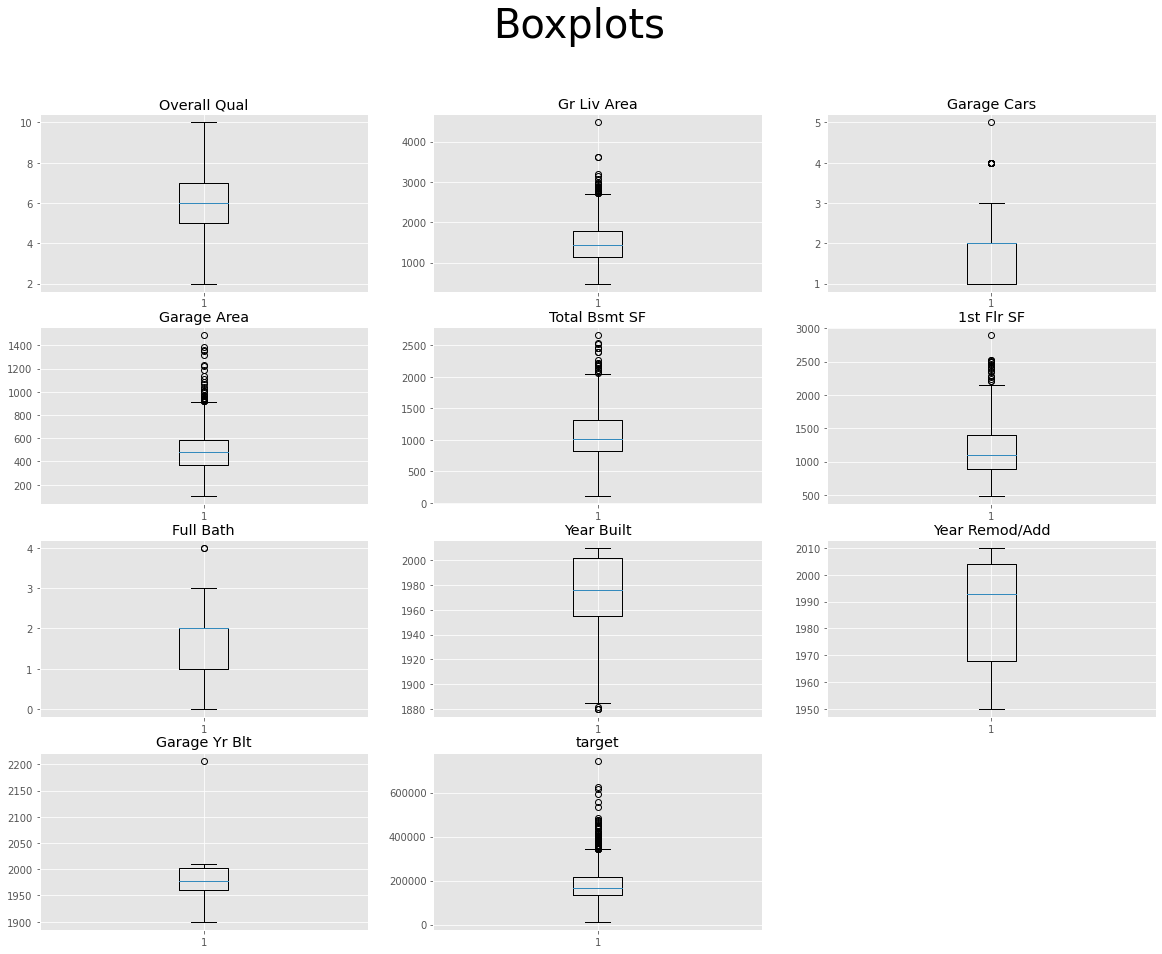

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

feature = numeric_feature

# Boxplot 을 사용해서 데이터의 분포를 살펴봅니다.
plt.figure(figsize=(20,15))
plt.suptitle("Boxplots", fontsize=40)

for i in range(len(feature)):
    plt.subplot(4,3,i+1) # 수치형 데이터가 11개이므로 4*3=12개 자리가 필요합니다.
    plt.title(feature[i])
    plt.boxplot(data[feature[i]])
plt.show()

다양한 형태의 박스플롯이 그려졌습니다. 

이상치가 많이 존재하는 그래프도, 그렇지 않은 그래프도 있습니다.

분포나 이상치를 파악하는 등 본인만의 인사이트를 찾아보세요!

### 카테고리형 데이터 시각화

Bar plot을 이용해 카테고리형 데이터를 시각화 합니다.

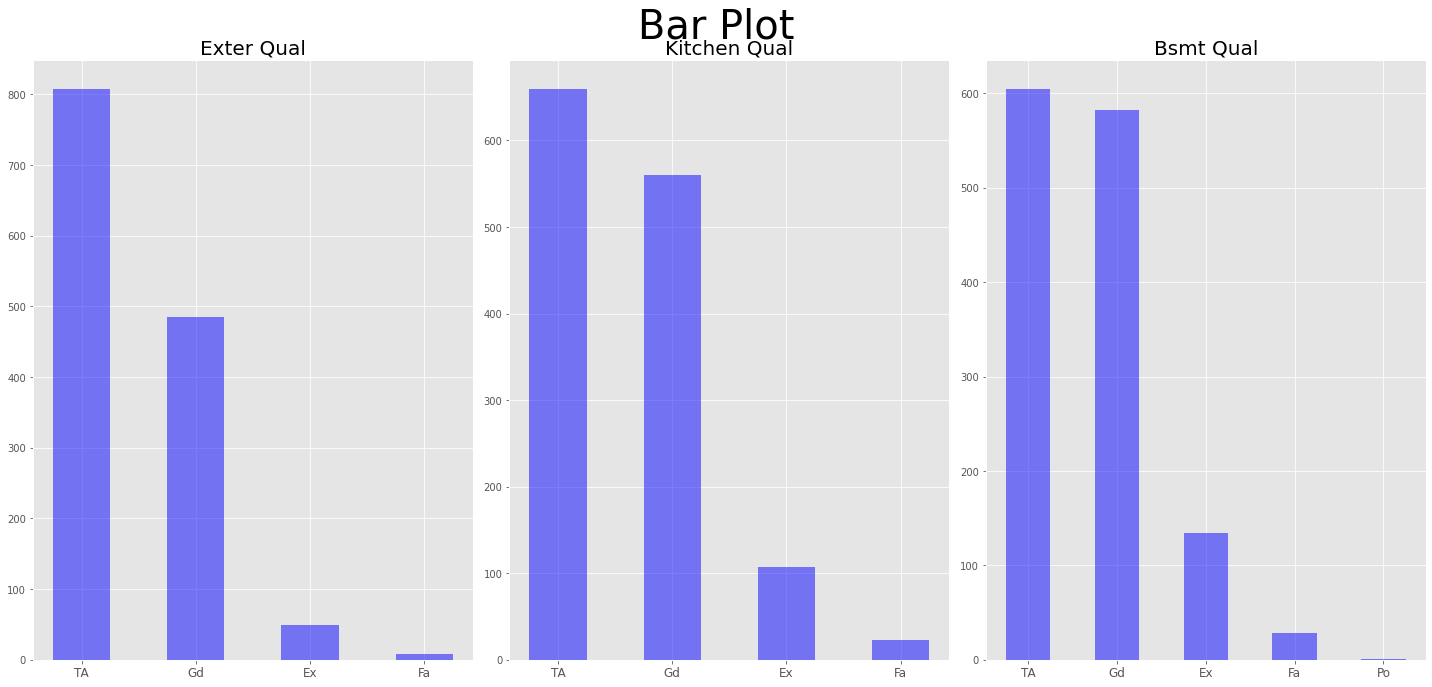

In [15]:
# 히스토그램 을 사용해서 데이터의 분포를 살펴봅니다.
feature = categorical_feature

plt.figure(figsize=(20,10))
plt.suptitle("Bar Plot", fontsize=40)

for i in range(len(feature)):
    plt.subplot(1,3,i+1)
    plt.title(feature[i], fontsize=20)
    temp = data[feature[i]].value_counts()
    plt.bar(temp.keys(), temp.values, width=0.5, color='b', alpha=0.5)
    plt.xticks(temp.keys(), fontsize=12)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

범주형 변수들의 그래프가 다양하게 나타나고 있네요.

각 요소들의 분포가 고르기보다는 특정 값들에 몰려 있는 것 같습니다.

변수를 처리하는 데 유용한 정보가 될 것 같네요!

## 상관관계 시각화

feature들 간의 상관관계를 살펴보는 것은 분석에 많은 도움이 됩니다.

먼저 전체 feature들 간의 상관관계를 살펴본 뒤

주요 feature와 타겟 feature의 상관관계를 산점도를 통해 살펴보겠습니다.


In [9]:
# 먼저 상관계수 계산을 위해 텍스트 형식의 데이터를 숫자로 변환해줍니다.
from sklearn.preprocessing import LabelEncoder

corr_df = data.copy()
corr_df[corr_df.columns[corr_df.dtypes=='O']] = corr_df[corr_df.columns[corr_df.dtypes=='O']].astype(str).apply(LabelEncoder().fit_transform)

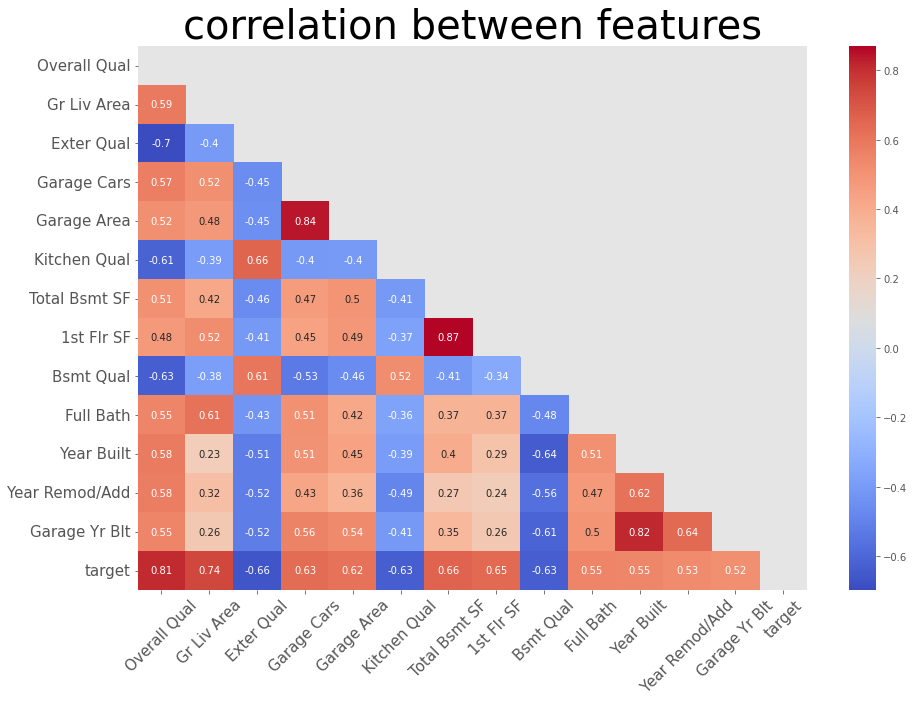

In [10]:
#상관관계 분석도
plt.figure(figsize=(15,10))

heat_table = corr_df.corr()
mask = np.zeros_like(heat_table)
mask[np.triu_indices_from(mask)] = True
heatmap_ax = sns.heatmap(heat_table, annot=True, mask = mask, cmap='coolwarm')
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=15, rotation=45)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=15)
plt.title('correlation between features', fontsize=40)
plt.show()

target feature인 SalePrice 는 Overall Qual과 가장 큰 상관(0.81)을 보이네요!

그 이외에도 

* Gr Liv Area: 0.74
* Garage Cars: 0.63
* 1st Flr SF: 0.65
* Total Bsmt SF: 0.66

등으로 다른 변수들과도 높은 상관을 보입니다.

## Target과 다른 feature들과의 관계

상관 분석을 통해 얻은 결과를 좀 더 자세하게 살펴보겠습니다.

In [11]:
# target을 설정해줍니다.
target = "target"

### target과 수치형 feature의 관계

수치형 feature를 시각화하기 위해 scatter plot을 이용해보겠습니다.

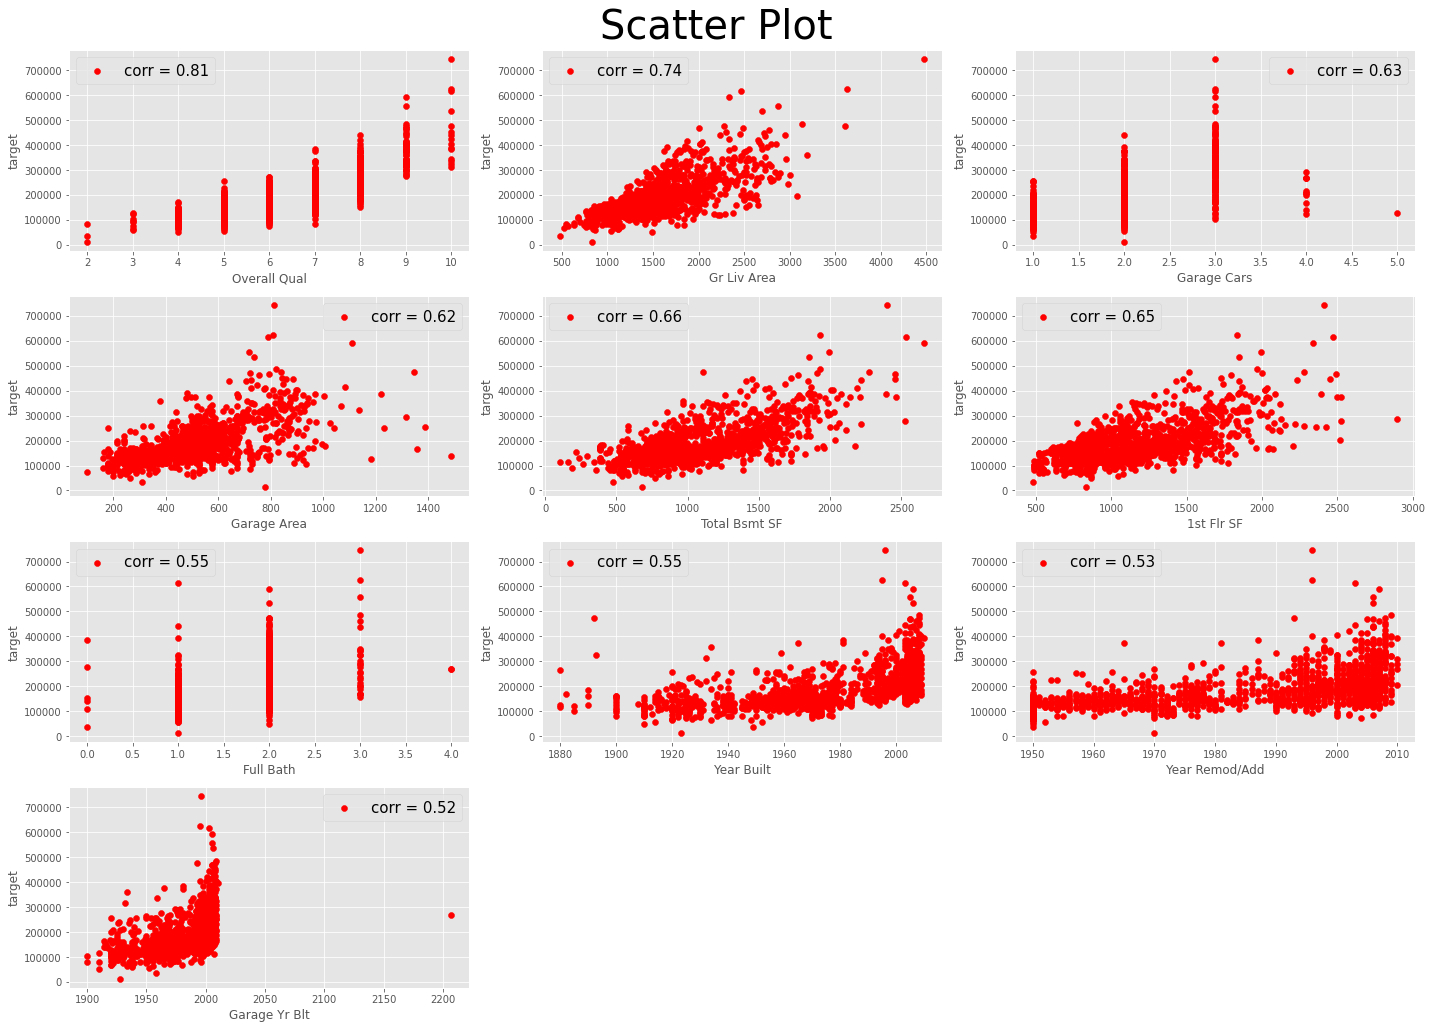

In [12]:
feature = numeric_feature

plt.figure(figsize=(20,15))
plt.suptitle("Scatter Plot", fontsize=40)

# id는 제외하고 시각화합니다.
for i in range(len(feature[:-1])):
    plt.subplot(4,3,i+1)
    plt.xlabel(feature[i])
    plt.ylabel(target)
    corr_score = data[[feature[i], target]].corr().iloc[0,1].round(2)
    c = 'red' if corr_score > 0 else 'blue'
    plt.scatter(data[feature[i]], data[target], color=c, label=f"corr = {corr_score}")
    plt.legend(fontsize=15)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

상관관ㅖ 그래프를 살펴보니 몇몇 변수가 타겟변수와 상당한  양의 상관관계를 보이고 있음을 확인할 수 있습니다.

특히 Overall Qual 변수는 0.81로 강한 상관관계를 나타내는군요!

그리고 두 번째로 Gr Liv Area 변수가 0.74의 상관도를 가집니다.

### target과 카테고리형 feature의 관계

카테고리에 따른 target feature의 분포를 살펴보기 위해 violin 그래프를 사용해보겠습니다.

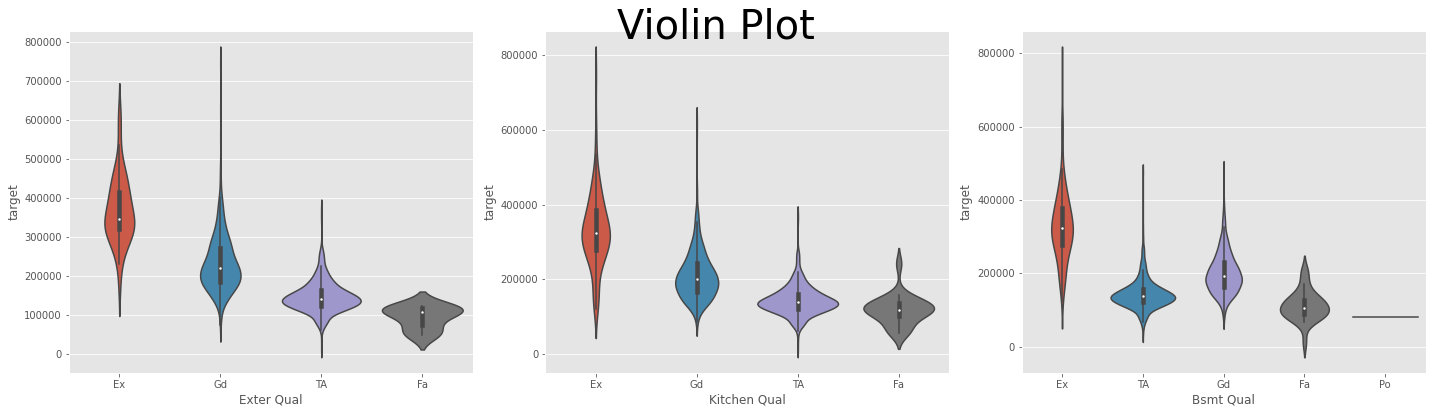

In [13]:
feature = categorical_feature

plt.figure(figsize=(20,6))
plt.suptitle("Violin Plot", fontsize=40)

# id는 제외하고 시각화합니다.
for i in range(len(feature)):
    plt.subplot(1,3,i+1)
    plt.xlabel(feature[i])
    plt.ylabel(target)
    sns.violinplot(x= data[feature[i]], y= data[target])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

바리올린 플롯을 통해 범주형 변수의 분포를 확인해 보았습니다. 

Ex에 해당하는 값들이 베 범주형 변수 전반에 걸쳐 상대적으로 높은 집값 분포를 나타내고 있습니다.

이제 이 노트북에서 데이터를 둘러보는 작업은 마무리하겠습니다.

여러분은 어떤 인사이트를 얻으셨나요?

이번 EDA를 통해 어떤 방식으로 분석을 진행해야겠다는 자그마한 인사이트를 얻으셨으면 좋겠습니다.

여러분도 여러분만의 EDA를 진행하시고 코드공유에 올려주세요!

좋아요를 많이 받으시는 분께는 데이콘 후드가 제공됩니다!